# 03 BMRA

Run BMRA based on global responses derived from the pathway activity predictions.

In [1]:
import pandas as pd
import numpy as np
import os
import bmra

In [2]:
cell_line = 'CAL29'

data_dir =f'/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_bmra/blca_publication_OUTPUT_bmra_{cell_line}/'
data_dir_1 = os.path.join(data_dir, f'00_outputs_2020_{cell_line}/')
data_dir_2 = os.path.join(data_dir, f'01_outputs_2020_{cell_line}/')

info_dir =f"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/00_outputs_2020_{cell_line}/"

out_dir = os.path.join(data_dir,f'02_outputs_2020_{cell_line}/')


os.makedirs(out_dir, exist_ok = True)

## Load data

### Global responses

Assembled from global responses calculated from predicted pathway activities, and DPD global responses.

In [3]:
def assemble_R_global(pathway_rglobal_file, dpd_rglobal_file):
    """
    Assemble full R_global matrix
    """
    R_global_modules_df = pd.read_csv(pathway_rglobal_file, index_col = 0)

    perts = R_global_modules_df.columns.tolist()

    R_global_DPD_df = pd.read_csv(dpd_rglobal_file, index_col=0).T

    # filter by perts list
    R_global_DPD_df = R_global_DPD_df[R_global_DPD_df.index.isin(perts)]

    # sort by perts list
    R_global_DPD_df["sort_col"] = R_global_DPD_df.index.map({val: i for i, val in enumerate(perts)})
    R_global_DPD_df = R_global_DPD_df.sort_values("sort_col")
    R_global_DPD_df = R_global_DPD_df.drop("sort_col", axis = 1)

    # transpose
    R_global_DPD_df = R_global_DPD_df.T

    R_global_df = pd.concat([R_global_modules_df, R_global_DPD_df])

    return R_global_df

In [4]:
R_global_df = assemble_R_global(
    pathway_rglobal_file = os.path.join(data_dir_2, "R_global_annotated.csv"),
    dpd_rglobal_file = os.path.join(data_dir_1, "R_global_DPDonly_annotated.csv"),
)

modules = R_global_df.index.tolist()
exp_ids = R_global_df.columns.tolist()

R_global = R_global_df.values
n_modules = R_global.shape[0]

print(R_global.shape)
display(R_global_df)

(14, 122)


,ASG002_CAL29_24H:A10,ASG002_CAL29_24H:A11,ASG002_CAL29_24H:A12,ASG002_CAL29_24H:A19,ASG002_CAL29_24H:A20,ASG002_CAL29_24H:A21,ASG002_CAL29_24H:B03,ASG002_CAL29_24H:B10,ASG002_CAL29_24H:B11,ASG002_CAL29_24H:B12,...,MOAR011_CAL29_24H:C03,MOAR011_CAL29_24H:C10,MOAR011_CAL29_24H:C11,MOAR011_CAL29_24H:C12,MOAR011_CAL29_24H:F07,MOAR011_CAL29_24H:F08,MOAR011_CAL29_24H:F09,MOAR011_CAL29_24H:J10,MOAR011_CAL29_24H:J11,MOAR011_CAL29_24H:J12
Androgen,0.150262,0.095665,0.012547,-0.013771,-0.006036,0.168258,-0.092567,-0.090164,0.048508,-0.023503,...,-0.019674,-0.114086,-0.066424,-0.029193,0.026365,0.057410,-0.144436,-0.534283,-0.141983,-0.024970
CDK1_2,-0.578339,-0.564554,-0.140775,-0.527591,-0.168757,-0.216183,0.215387,-0.124171,-0.815990,-0.157987,...,-0.021328,-0.042051,0.045416,0.178023,-0.258331,0.011182,-0.061042,0.000832,-0.101726,-0.123756
CDK4_6,-0.507148,-0.652875,-0.232881,-0.054294,-0.103414,-0.274895,-0.443980,-0.331390,-0.128014,-0.206305,...,0.030002,0.072742,-0.075981,0.019697,0.334045,0.450317,0.511619,0.564630,0.526212,0.613684
EGFR,-1.086834,-0.801803,-0.472094,-1.995998,-0.319601,-0.550150,-0.197896,-0.553170,-0.060185,-0.395944,...,0.174706,0.156980,-0.032680,0.077943,0.273510,0.207820,0.189513,0.148242,0.123133,0.319563
Estrogen,-0.620365,0.040248,0.192045,0.104938,-0.199023,-0.017536,-0.116675,-0.204021,-0.082394,-0.300859,...,0.065754,0.191310,-0.081545,-0.007441,0.193023,0.190272,0.132330,0.170874,0.102490,0.197764
FGFR,0.280708,0.221220,0.094227,0.240247,0.235318,0.367413,0.106993,-0.075811,-0.139856,-0.111591,...,0.033177,-0.062255,0.056503,0.120957,-0.568850,-0.106812,0.005850,-0.040851,-0.023175,0.019579
PI3K,-1.988000,-1.716374,-1.427059,-1.771798,-1.320343,-0.574043,-0.420840,-0.273139,0.071973,-0.314176,...,0.340491,0.368180,0.223337,0.423294,0.537997,0.003684,-0.009361,0.115438,0.360885,0.202008
p53,-0.241161,0.159501,0.017205,-0.690175,-0.263419,-0.777197,-0.234970,-1.612368,-1.301574,-1.368841,...,0.295969,-0.104491,0.098411,0.246676,-0.110728,-0.020653,-0.090623,-0.530560,0.113633,0.037181
TOP2A,-1.411496,-0.118343,0.111405,0.051349,0.213458,-0.223504,-0.394655,-0.205249,-0.156261,-0.373366,...,-0.081455,0.198192,-0.010148,0.046543,0.159600,0.152943,0.067537,0.169443,0.119695,0.197375
Src,-1.998928,-0.101589,0.047695,-0.147121,-0.940152,-0.831037,-0.076644,-0.606926,0.108940,-0.041947,...,0.150828,0.170718,-0.284087,0.320650,0.230499,0.101866,-0.119650,0.186785,0.178053,-0.308739


In [5]:
print(R_global_df.values.min())
print(R_global_df.values.max())

-193.0850184866716
34.66206888804457


### Perturbation matrix

In [6]:
inhib_conc_df = pd.read_csv(os.path.join(data_dir_1, "inhib_conc_annotated.csv"), index_col = 0)
#LFC_PLCg = pd.read_csv(os.path.join(info_dir,"PLCg_Data_log_2020.csv"),index_col=0)
#inhib_conc = inhib_conc_df.drop(columns=LFC_PLCg.index).values
inhib_conc = inhib_conc_df.values

n_DPDs = R_global.shape[0] - inhib_conc.shape[0]

pert_modules = np.where(inhib_conc != 0, 1, 0)
pert_DPD = np.zeros((n_DPDs, len(exp_ids)))

pert = np.vstack([pert_modules, pert_DPD])

print(pert.shape)
print(pert)

(14, 122)
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Networks

In [7]:
# empty prior
#G_prior = np.zeros((n_modules, n_modules))
G_prior_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020_july_25.xlsx"), sheet_name = "prior_net_work", index_col = 0)

G_prior = G_prior_df.values
G_prior_df

,CDK1_2,CDK4_6,EGFR,PI3K,FGFR,TOP2A,p53,Src,TGFb,Estrogen,Androgen,blca_inv,blca_onc,surv_coef
CDK1_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK4_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EGFR,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PI3K,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FGFR,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TOP2A,0,0,0,0,0,0,0,0,0,0,0,0,0,0
p53,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Src,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TGFb,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Estrogen,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#G_prior_r_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020.xlsx"), sheet_name = "prior_r", index_col = 0)

#G_prior_r = G_prior_r_df.values
#G_prior_r_df

In [9]:
G_not = np.eye(n_modules)
G_not[:, n_modules - n_DPDs :] = 1

G_not

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

## Run BMRA

In [10]:
n_gibbs = 200_000
n_window = 5_000

mode = "all"
n_iterations = 1

In [11]:
A_mean, A_sd, r_mean, r_sd = bmra.run_bmra(R_global,
            pert,
            G_prior,
            G_not,
            #r_prior = G_prior_r,
            n_gibbs = n_gibbs,
            n_window = n_window,
            mode = mode,
            n_iterations = n_iterations,
        )

A_mean_df = pd.DataFrame(A_mean, index = modules, columns = modules)
A_sd_df = pd.DataFrame(A_sd, index = modules, columns = modules)
r_mean_df = pd.DataFrame(r_mean, index = modules, columns = modules)
r_sd_df = pd.DataFrame(r_sd, index = modules, columns = modules)

display(A_mean_df)
display(A_sd_df)
display(r_mean_df)
display(r_sd_df)

A_mean_df.to_csv(os.path.join(out_dir, "A_mean.csv"))
A_sd_df.to_csv(os.path.join(out_dir, "A_sd.csv"))
r_mean_df.to_csv(os.path.join(out_dir, "r_mean.csv"))
r_sd_df.to_csv(os.path.join(out_dir, "r_sd.csv"))

,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.961927,0.000000,0.000000,0.000000,0.000000,0.000000,0.038073,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,0.000000,0.000000,1.000000,0.000000,0.044517,1.000000,0.010491,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,1.000000,0.000161,0.646982,0.000831,0.010726,1.000000,1.000000,0.700164,0.0,0.0,0.0
EGFR,0.0,0.011489,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.034576,0.000566,0.000000,0.000000,0.000000,0.007962,1.000000,0.000000,0.272322,0.000000,0.0,0.0,0.0
PI3K,0.0,1.000000,0.086858,1.000000,0.059387,0.000000,0.000000,0.000000,0.963008,0.000000,0.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.464682,0.426633,1.000000,0.000000,1.000000,0.000000,0.000000,0.117291,0.000000,0.0,0.0,0.0
Src,0.0,0.000000,1.000000,0.000000,0.000000,0.018710,0.443586,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,1.913736e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.913736e-01,0.000000e+00,0.000000e+00,0.0,0.0,0.0
CDK1_2,0.0,0.000000,0.000000e+00,1.554312e-15,0.000000e+00,2.062413e-01,1.554312e-15,1.018847e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000e+00,6.661338e-16,1.267274e-02,4.779083e-01,2.881170e-02,1.030083e-01,6.661338e-16,6.661338e-16,4.581861e-01,0.0,0.0,0.0
EGFR,0.0,0.106567,3.996803e-15,0.000000e+00,0.000000e+00,0.000000e+00,3.996803e-15,3.996803e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.110223e-16,1.110223e-16,0.000000e+00,0.0,0.0,0.0
FGFR,0.0,0.182703,2.378734e-02,0.000000e+00,0.000000e+00,0.000000e+00,8.887564e-02,5.551115e-16,0.000000e+00,4.451549e-01,0.000000e+00,0.0,0.0,0.0
PI3K,0.0,0.000000,2.816261e-01,0.000000e+00,2.363478e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.887432e-01,0.000000e+00,0.000000e+00,0.0,0.0,0.0
p53,0.0,0.000000,0.000000e+00,3.996803e-15,0.000000e+00,3.996803e-15,0.000000e+00,0.000000e+00,0.000000e+00,3.996803e-15,3.996803e-15,0.0,0.0,0.0
TOP2A,0.0,0.000000,4.987511e-01,4.945880e-01,4.440892e-15,0.000000e+00,4.440892e-15,0.000000e+00,0.000000e+00,3.217667e-01,0.000000e+00,0.0,0.0,0.0
Src,0.0,0.000000,1.332268e-15,0.000000e+00,0.000000e+00,1.354987e-01,4.968072e-01,0.000000e+00,1.332268e-15,0.000000e+00,0.000000e+00,0.0,0.0,0.0


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.055591,0.000000,0.000000,0.000000,0.000000,0.000000,0.002519,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,0.000000,0.000000,0.136331,0.000000,0.005791,0.171434,0.000712,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,0.171662,0.000017,0.095721,0.000044,-0.000709,0.377814,0.271318,-0.089276,0.0,0.0,0.0
EGFR,0.0,0.001756,0.381885,0.000000,0.000000,0.000000,0.319433,0.148098,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.495083,0.132111,0.000000,0.0,0.0,0.0
FGFR,0.0,0.004309,0.000043,0.000000,0.000000,0.000000,0.000605,0.104966,0.000000,-0.027324,0.000000,0.0,0.0,0.0
PI3K,0.0,0.291735,0.018128,0.212221,0.017153,0.000000,0.000000,0.000000,0.437131,0.000000,0.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.237627,0.000000,0.447704,0.000000,0.000000,0.000000,0.235766,0.412772,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.061239,0.036169,0.413026,0.000000,0.106872,0.000000,0.000000,0.014178,0.000000,0.0,0.0,0.0
Src,0.0,0.000000,0.383811,0.000000,0.000000,-0.002807,0.047214,0.000000,0.326852,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.015986,0.000000,0.000000,0.000000,0.000000,0.000000,0.012664,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,0.000000,0.000000,0.012004,0.000000,0.027202,0.011975,0.006985,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,0.021503,0.001339,0.076181,0.001535,0.006990,0.037015,0.034321,0.063668,0.0,0.0,0.0
EGFR,0.0,0.016387,0.023144,0.000000,0.000000,0.000000,0.018365,0.014911,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021488,0.018535,0.000000,0.0,0.0,0.0
FGFR,0.0,0.023973,0.001862,0.000000,0.000000,0.000000,0.007177,0.015498,0.000000,0.047292,0.000000,0.0,0.0,0.0
PI3K,0.0,0.033528,0.059871,0.025649,0.069485,0.000000,0.000000,0.000000,0.096752,0.000000,0.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.023371,0.000000,0.039483,0.000000,0.000000,0.000000,0.032176,0.041331,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.068442,0.044041,0.034238,0.000000,0.020907,0.000000,0.000000,0.039596,0.000000,0.0,0.0,0.0
Src,0.0,0.000000,0.036490,0.000000,0.000000,0.020798,0.055212,0.000000,0.038029,0.000000,0.000000,0.0,0.0,0.0


In [12]:
np.fill_diagonal(r_mean_df.values,-1)
rm_minus_inv = pd.DataFrame(np.linalg.pinv(r_mean_df),index=r_mean_df.index,columns=r_mean_df.columns)*(-1)
rm_minus_inv.to_csv(os.path.join(out_dir, 'r_minv.csv'))
display(rm_minus_inv)

,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.004383,0.078478,0.020116,0.024810,0.008787,0.014774,0.002955,0.059453,0.026134,-0.005787,1.616744e-17,1.721334e-17,-1.202630e-16
CDK1_2,1.425433e-16,1.088111,0.144145,0.256588,0.114161,0.039432,0.299899,0.043604,0.263941,0.066902,0.005130,1.027176e-16,-3.016378e-17,5.523607e-18
CDK4_6,-3.021170e-17,0.075630,1.401065,0.354390,0.416588,0.156514,0.254797,0.051959,0.997985,0.462036,-0.103634,4.999704e-17,-2.458252e-16,2.614998e-16
EGFR,3.658258e-17,0.161656,0.661716,1.329051,0.311907,0.161180,0.543740,0.218182,0.732566,0.276746,0.030984,2.131651e-17,-1.933903e-16,-7.588618e-17
Estrogen,2.123876e-16,0.044428,0.199203,0.109291,1.376569,0.026310,0.151244,0.017186,0.905443,0.252566,-0.010690,1.214364e-16,-1.082198e-17,-6.950024e-18
FGFR,-1.049361e-16,0.008611,0.002236,0.033640,0.003713,1.055623,0.013723,0.123647,0.008420,-0.000802,0.050838,1.250265e-16,-7.188277e-17,2.895971e-17
PI3K,-6.304658e-18,0.384900,0.313790,0.437166,0.417212,0.063914,1.315771,0.071752,0.955478,0.168899,0.001603,-2.355061e-17,-3.054041e-16,-3.224697e-18
p53,-1.480618e-16,0.053437,0.176788,0.362047,0.130631,0.546423,0.172922,1.183968,0.309090,0.312173,0.472926,4.239822e-17,-9.394723e-18,1.397765e-18
TOP2A,-1.619422e-16,0.070961,0.234466,0.164617,0.655524,0.034123,0.241744,0.026288,1.577077,0.178304,-0.010081,-5.765244e-18,-8.700185e-17,9.161676e-17
Src,9.344426e-17,0.070370,0.629189,0.210370,0.393838,0.071279,0.238893,0.031575,0.943596,1.243590,-0.043138,6.142758e-18,-1.916681e-16,2.925168e-16


In [13]:
con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in r_mean_df.index:
    for con_from in r_mean_df.columns:
        if ((r_mean_df.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,r_mean_df.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net.txt'),sep='\t',index=False)
display(con_mat)

,From,To,Strength
0,CDK4_6,Androgen,0.055591
1,TOP2A,Androgen,0.002519
2,EGFR,CDK1_2,0.136331
3,FGFR,CDK1_2,0.005791
4,PI3K,CDK1_2,0.171434
5,p53,CDK1_2,0.000712
6,EGFR,CDK4_6,0.171662
7,Estrogen,CDK4_6,0.000017
8,FGFR,CDK4_6,0.095721
9,PI3K,CDK4_6,0.000044


In [14]:
# now the same but with filtered matrices
# threshold value
Athr = 0.5

rm_filt = r_mean_df[np.abs(A_mean_df) > Athr].fillna(0).copy()
np.fill_diagonal(rm_filt.values,-1)
rm_filt.to_csv(os.path.join(out_dir, 'r_mean_filt.csv'))
display(rm_filt)

rm_filt_minus_inv = pd.DataFrame(np.linalg.pinv(rm_filt),index=rm_filt.index,columns=rm_filt.columns)*(-1)
rm_filt_minus_inv.to_csv(os.path.join(out_dir, 'r_minv_filt.csv'))
display(rm_minus_inv)

con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in rm_filt.index:
    for con_from in rm_filt.columns:
        if ((rm_filt.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,rm_filt.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net_filt.txt'),sep='\t',index=False)
#display(con_mat)


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.055591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,-1.000000,0.000000,0.136331,0.000000,0.000000,0.171434,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,-1.000000,0.171662,0.000000,0.095721,0.000000,0.000000,0.377814,0.271318,-0.089276,0.0,0.0,0.0
EGFR,0.0,0.000000,0.381885,-1.000000,0.000000,0.000000,0.319433,0.148098,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.495083,0.132111,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.104966,0.000000,0.000000,0.000000,0.0,0.0,0.0
PI3K,0.0,0.291735,0.000000,0.212221,0.000000,0.000000,-1.000000,0.000000,0.437131,0.000000,0.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.237627,0.000000,0.447704,0.000000,-1.000000,0.000000,0.235766,0.412772,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.000000,0.413026,0.000000,0.106872,0.000000,-1.000000,0.000000,0.000000,0.0,0.0,0.0
Src,0.0,0.000000,0.383811,0.000000,0.000000,0.000000,0.000000,0.000000,0.326852,-1.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.004383,0.078478,0.020116,0.024810,0.008787,0.014774,0.002955,0.059453,0.026134,-0.005787,1.616744e-17,1.721334e-17,-1.202630e-16
CDK1_2,1.425433e-16,1.088111,0.144145,0.256588,0.114161,0.039432,0.299899,0.043604,0.263941,0.066902,0.005130,1.027176e-16,-3.016378e-17,5.523607e-18
CDK4_6,-3.021170e-17,0.075630,1.401065,0.354390,0.416588,0.156514,0.254797,0.051959,0.997985,0.462036,-0.103634,4.999704e-17,-2.458252e-16,2.614998e-16
EGFR,3.658258e-17,0.161656,0.661716,1.329051,0.311907,0.161180,0.543740,0.218182,0.732566,0.276746,0.030984,2.131651e-17,-1.933903e-16,-7.588618e-17
Estrogen,2.123876e-16,0.044428,0.199203,0.109291,1.376569,0.026310,0.151244,0.017186,0.905443,0.252566,-0.010690,1.214364e-16,-1.082198e-17,-6.950024e-18
FGFR,-1.049361e-16,0.008611,0.002236,0.033640,0.003713,1.055623,0.013723,0.123647,0.008420,-0.000802,0.050838,1.250265e-16,-7.188277e-17,2.895971e-17
PI3K,-6.304658e-18,0.384900,0.313790,0.437166,0.417212,0.063914,1.315771,0.071752,0.955478,0.168899,0.001603,-2.355061e-17,-3.054041e-16,-3.224697e-18
p53,-1.480618e-16,0.053437,0.176788,0.362047,0.130631,0.546423,0.172922,1.183968,0.309090,0.312173,0.472926,4.239822e-17,-9.394723e-18,1.397765e-18
TOP2A,-1.619422e-16,0.070961,0.234466,0.164617,0.655524,0.034123,0.241744,0.026288,1.577077,0.178304,-0.010081,-5.765244e-18,-8.700185e-17,9.161676e-17
Src,9.344426e-17,0.070370,0.629189,0.210370,0.393838,0.071279,0.238893,0.031575,0.943596,1.243590,-0.043138,6.142758e-18,-1.916681e-16,2.925168e-16


In [15]:
# number of zero elements in the matrix
display(len(rm_filt.index)*len(rm_filt.columns) - rm_filt.astype(bool).sum().sum())

151

In [16]:
# number of non-zero elements in the matrix
display(rm_filt.astype(bool).sum().sum() - len(modules))

31

### Visualization

In [19]:
df_subset=rm_filt_minus_inv[['Androgen', 'CDK1_2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'p53','PI3K',  'TOP2A','Src','TGFb']]
df_subset = df_subset.loc[['blca_basal_luminal',	'blca_oncogenesis',	'blca_survival']]

In [20]:
t_df_subset=df_subset.T
df_subset.reset_index(inplace=True)

Text(0.5, 1.0, 'Predicted global signaling pathway responses of CAL29 cell line under conditions ')

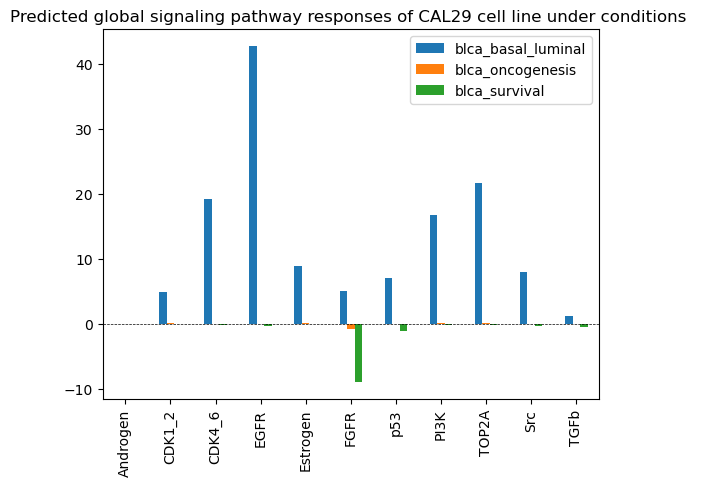

In [21]:
import matplotlib.pyplot as plt
t_df_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted global signaling pathway responses of {cell_line} cell line under conditions ")

In [22]:
display(rm_filt)
rm_subset=rm_filt[['Androgen','CDK1_2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A','Src','TGFb']]

,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.055591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,-1.000000,0.000000,0.136331,0.000000,0.000000,0.171434,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,-1.000000,0.171662,0.000000,0.095721,0.000000,0.000000,0.377814,0.271318,-0.089276,0.0,0.0,0.0
EGFR,0.0,0.000000,0.381885,-1.000000,0.000000,0.000000,0.319433,0.148098,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.495083,0.132111,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.104966,0.000000,0.000000,0.000000,0.0,0.0,0.0
PI3K,0.0,0.291735,0.000000,0.212221,0.000000,0.000000,-1.000000,0.000000,0.437131,0.000000,0.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.237627,0.000000,0.447704,0.000000,-1.000000,0.000000,0.235766,0.412772,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.000000,0.413026,0.000000,0.106872,0.000000,-1.000000,0.000000,0.000000,0.0,0.0,0.0
Src,0.0,0.000000,0.383811,0.000000,0.000000,0.000000,0.000000,0.000000,0.326852,-1.000000,0.000000,0.0,0.0,0.0


In [23]:
rm_subset=rm_subset.loc[['blca_basal_luminal',	'blca_oncogenesis',	'blca_survival']]
rm_subset=rm_subset.T
display(rm_subset)

,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,0.000000,0.000000,0.000000
CDK1_2,0.000000,0.000000,0.000000
CDK4_6,0.000000,0.000000,0.000000
EGFR,33.521893,0.000000,0.000000
Estrogen,0.000000,0.000000,0.000000
FGFR,0.000000,-0.751089,-8.510654
PI3K,0.000000,0.161180,0.000000
p53,0.000000,0.000000,0.000000
TOP2A,0.000000,0.000000,0.000000
Src,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Predicted local signaling pathway responses of CAL29 cell line under conditions ')

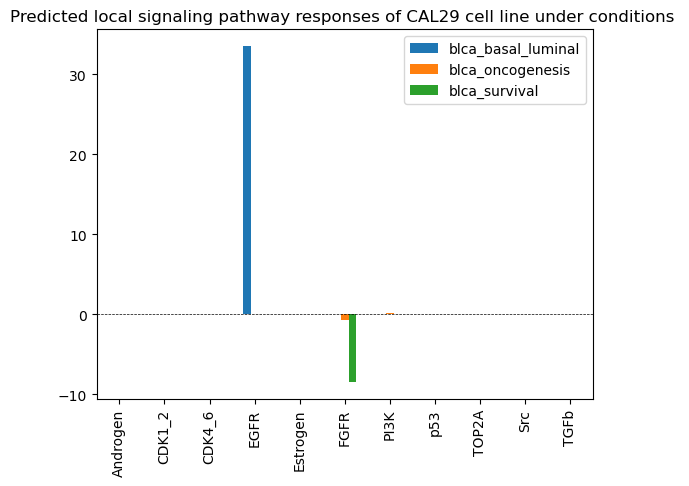

In [24]:
rm_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted local signaling pathway responses of {cell_line} cell line under conditions ")